# Homework 2: Regression


The goal of this homework is to create a regression model for predicting housing prices (column 'median_house_value').
## Loading Libraries


In [14]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Fetching Data from web

wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

In [3]:
#!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv >housing.csv

## EDA

In [8]:
df_data = pd.read_csv('housing.csv')

In [10]:
print(df_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [11]:
print(df_data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [12]:
df_data.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

#### Distribution of median_house_value

<AxesSubplot: >

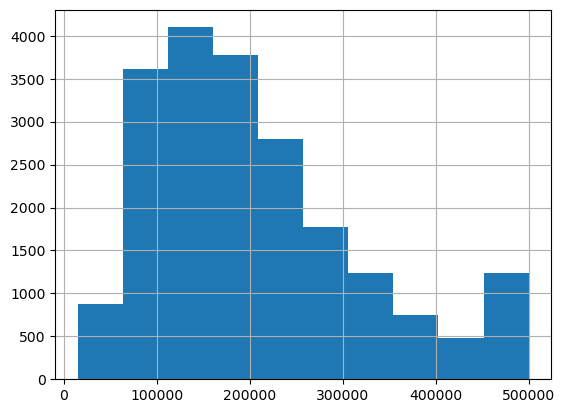

In [13]:
df_data['median_house_value'].hist()   

<AxesSubplot: xlabel='median_house_value', ylabel='Count'>

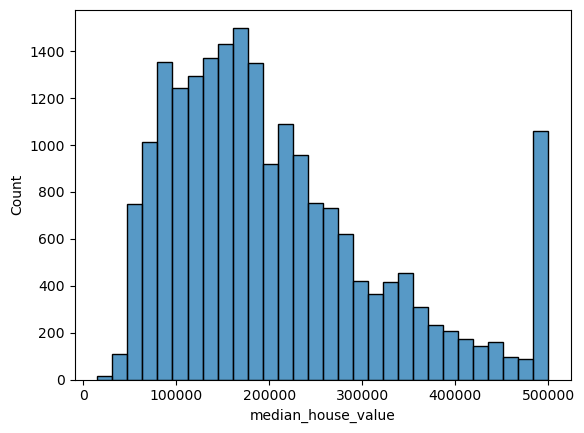

In [17]:
sns.histplot(df_data['median_house_value'],bins = 30)

In [18]:
df_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [21]:
df_data_filter1 = df_data.loc[map(lambda x:x in ['<1H OCEAN', 'INLAND'],df_data['ocean_proximity']),:]

In [22]:
df_data_filter1['ocean_proximity'].unique()

array(['<1H OCEAN', 'INLAND'], dtype=object)

In [23]:
df_data_filter1=df_data_filter1[['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']]

### Q!There's one feature with missing values. What is it?

In [24]:
df_data_filter1.isna().sum()
#total_bedrooms has 157 NaN values

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

### Question 2
What's the median (50% percentile) for variable 'population'?

In [25]:
df_data['population'].describe()

count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: population, dtype: float64

<AxesSubplot: >

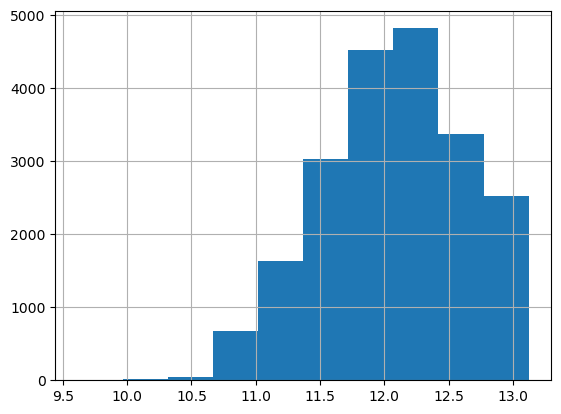

In [28]:
np.log1p(df_data['median_house_value']).hist()

In [30]:
df_data['median_house_value'] = np.log1p(df_data['median_house_value'])

In [31]:
n = len(df_data_filter1)

n_val = int(0.2*n)
n_test = int(0.2*n)
n_train = n - n_val - n_test
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
df_train = df_data_filter1.iloc[idx[:n_train]]
df_val = df_data_filter1.iloc[idx[n_train:n_train+n_val]]
df_test = df_data_filter1.iloc[idx[n_train+n_val:]]

In [33]:
mean_total_bedroom = df_train['total_bedrooms'].mean()
mean_total_bedroom

542.552956325786

In [ ]:
df_train1 = df_train['total_bedrooms'].fillna(mean_total_bedroom)
df_train2 = df_train['total_bedrooms'].fillna(0) 

In [34]:
print(df_val.isna().sum())
df_val1 = df_val['total_bedrooms'].fillna(mean_total_bedroom)
df_val2 = df_val['total_bedrooms'].fillna(0) 

latitude               0
longitude              0
housing_median_age     0
total_rooms            0
total_bedrooms        29
population             0
households             0
median_income          0
median_house_value     0
dtype: int64

In [35]:
print(df_test.isna().sum())
df_test1 = df_test['total_bedrooms'].fillna(mean_total_bedroom)
df_test2 = df_test['total_bedrooms'].fillna(0) 



latitude               0
longitude              0
housing_median_age     0
total_rooms            0
total_bedrooms        34
population             0
households             0
median_income          0
median_house_value     0
dtype: int64

In [44]:
xi = [453,11,86]
w0 = 7.17
w=[0.01,0.04,0.002]

#def linear_regression(xi):
#    n = len(xi)
#    pred = w0
#    for j in range(n):
#        pred = pred + w[j]*xi[j] 
#    return pred

def dot(xi,w):
    n= len(xi)
    res = 0.0
    for j in range(n):
        res = res + xi[j]*w[j]
    return res

w_new = [w0] + w
def linear_regression(xi):
    #return w0 + dot(xi,w)
    xi = [1] + xi
    return dot(xi,w_new)
linear_regression(xi)

12.312

In [40]:
np.expm1(12.312)

222347.2221101062

In [41]:
x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [49]:
def linear_regression(X):
    return X.dot(w_new)

In [50]:
print(w_new,np.array(X))
linear_regression(X)

[7.17, 0.01, 0.04, 0.002] [[   1  148   24 1385]
 [   1  132   25 2031]
 [   1  453   11   86]]


array([12.38 , 13.552, 12.312])

In [ ]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]